In [1]:
"""
Análisis Exploratorio de Datos (EDA) - Base Sakila

* Descripción del proyecto
Este notebook realiza un análisis exploratorio y visualización de datos provenientes de la base de datos Sakila, un dataset de ejemplo utilizado en análisis de datos y SQL.
El objetivo es analizar el comportamiento de los alquileres, categorías de películas, clientes frecuentes, películas más rentables e ingresos por tienda.

Los datos se limpian y transforman en las primeras etapas del notebook, y luego se usan en visualizaciones interactivas y gráficas.
Todos los archivos CSV limpios pueden ser descargados al final de esta plantilla.


* Estructura del notebook
1. Carga y limpieza de datos.
2. EDA y visualizaciones de cada CSV:
   - `detalle_alquileres`
   - `alquileres_por_mes_categoria`
   - `clientes_mas_frecuentes`
   - `peliculas_mas_rentables`
   - `ingresos_por_tienda_categoria`
3. Conclusiones detalladas.


* Descarga de CSVs limpios
En la parte final del Notebook va a estar disponible la opción de descarga de los csv limpios y con las columnas agregadas que fueron calculadas para hacer algunos cálculos adicionales.


* Nota sobre la carga de datos
Si deseas ejecutar el notebook con tus propios datos, modifica las rutas de los archivos CSV en la sección de carga de datos.
Ejemplo:

df = pd.read_csv('/ruta/a/tu/archivo.csv')

"""

"\nAnálisis Exploratorio de Datos (EDA) - Base Sakila\n\n* Descripción del proyecto\nEste notebook realiza un análisis exploratorio y visualización de datos provenientes de la base de datos Sakila, un dataset de ejemplo utilizado en análisis de datos y SQL.\nEl objetivo es analizar el comportamiento de los alquileres, categorías de películas, clientes frecuentes, películas más rentables e ingresos por tienda.\n\nLos datos se limpian y transforman en las primeras etapas del notebook, y luego se usan en visualizaciones interactivas y gráficas.\nTodos los archivos CSV limpios pueden ser descargados al final de esta plantilla.\n\n\n* Estructura del notebook\n1. Carga y limpieza de datos.\n2. EDA y visualizaciones de cada CSV:\n   - `detalle_alquileres`\n   - `alquileres_por_mes_categoria`\n   - `clientes_mas_frecuentes`\n   - `peliculas_mas_rentables`\n   - `ingresos_por_tienda_categoria`\n3. Conclusiones detalladas.\n\n\n* Descarga de CSVs limpios\nEn la parte final del Notebook va a esta

In [2]:
# Ejecuta la celda de abajo si vas a hacer la carga de datos desde tu google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Librerías a usar en este Notebook

In [5]:
import os, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Sección 1: Analizando csv "clientes_mas_frecuentes"**

In [6]:
# Cargar el archivo CSV
df_clientes = pd.read_csv('/content/drive/MyDrive/archivos_colab/output_csv_sakila_mejorado/clientes_mas_frecuentes.csv')

## 1. Limpieza

In [7]:
# Inspección general
display(df_clientes.head())
df_clientes.info()

,customer_id,cliente,total_transacciones,total_gastado
0,526,KARL SEAL,45,221.55
1,148,ELEANOR HUNT,46,216.54
2,144,CLARA SHAW,42,195.58
3,137,RHONDA KENNEDY,39,194.61
4,178,MARION SNYDER,39,194.61


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          599 non-null    int64  
 1   cliente              599 non-null    object 
 2   total_transacciones  599 non-null    int64  
 3   total_gastado        599 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.8+ KB


In [8]:
# Limpieza básica
df_clientes.columns = df_clientes.columns.str.strip().str.lower().str.replace(" ", "_")
df_clientes.drop_duplicates(inplace = True)

In [9]:
# Verificar valores nulos
print(df_clientes.isnull().sum())

# Verificar valores únicos en columnas categóricas
for col in df_clientes.select_dtypes(include = 'object').columns:
    print(f'\n {col.upper()}')
    print(df_clientes[col].value_counts().head())

customer_id            0
cliente                0
total_transacciones    0
total_gastado          0
dtype: int64

 CLIENTE
cliente
CAROLINE BOWMAN    1
KARL SEAL          1
ELEANOR HUNT       1
CLARA SHAW         1
RHONDA KENNEDY     1
Name: count, dtype: int64


In [10]:
# Revisando estadísticas básicas para columnas numéricas
print(df_clientes.drop("customer_id", axis = 1).describe())

       total_transacciones  total_gastado
count           599.000000     599.000000
mean             26.784641     112.531820
std               5.110357      25.365837
min              12.000000      50.850000
25%              23.000000      94.785000
50%              26.000000     110.730000
75%              30.000000     128.705000
max              46.000000     221.550000


In [11]:
# Revisando para las columnas categóricas
print(df_clientes.select_dtypes(include = 'object').describe())

                cliente
count               599
unique              599
top     CAROLINE BOWMAN
freq                  1


## 2. EDA

### 2.1 KPIs

In [12]:
#KPIs claves

print(f"Total de clientes analizados: {df_clientes.shape[0]}")
print(f"Transacciones totales: {df_clientes['total_transacciones'].sum():,.0f}")
print(f"Ingreso total generado por estos clientes: ${df_clientes['total_gastado'].sum():,.2f}")
print(f"Cliente que más gastó: {df_clientes.loc[df_clientes['total_gastado'].idxmax(), 'cliente']}")
print(f"Cliente más frecuente: {df_clientes.loc[df_clientes['total_transacciones'].idxmax(), 'cliente']}")

Total de clientes analizados: 599
Transacciones totales: 16,044
Ingreso total generado por estos clientes: $67,406.56
Cliente que más gastó: KARL SEAL
Cliente más frecuente: ELEANOR HUNT


### 2.2 Visualizaciones

#### Clientes con mayor gasto

/tmp/ipython-input-13-4251267336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'total_gastado', y = 'cliente', palette = "viridis")


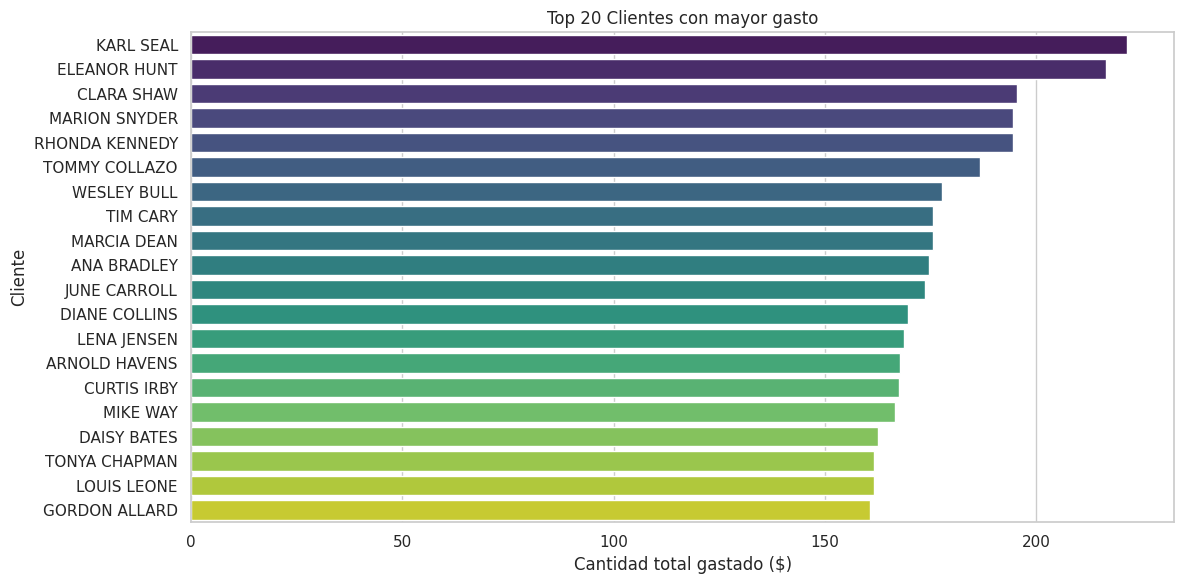

In [13]:
sns.set(style = "whitegrid")

# Top 20 clientes por cantidad de alquileres
top20 = df_clientes.sort_values('total_gastado', ascending = False).head(20)

plt.figure(figsize = (12,6))
sns.barplot(data = top20, x = 'total_gastado', y = 'cliente', palette = "viridis")
plt.title("Top 20 Clientes con mayor gasto")
plt.xlabel("Cantidad total gastado ($)")
plt.ylabel("Cliente")
plt.tight_layout()
plt.show()


#### Clientes con mayores transacciones

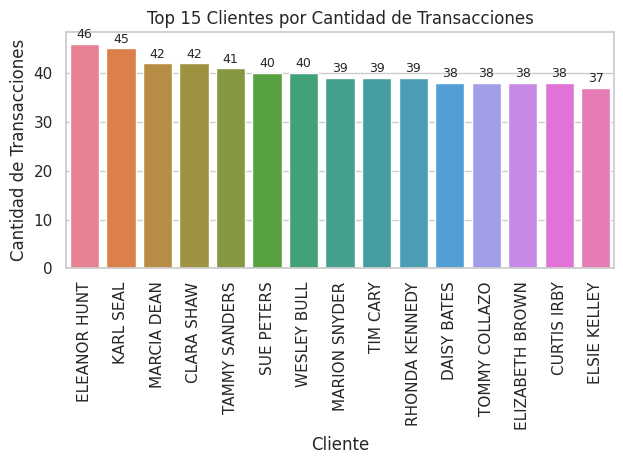

In [14]:
# Top 15 de clientes por cantidad de transacciones
sns.set(style = "whitegrid")

top_15 = df_clientes.sort_values("total_transacciones", ascending = False).head(15)

barplot = sns.barplot(data = top_15, x = "cliente", y = "total_transacciones", hue = "cliente", legend = False)
plt.title("Top 15 Clientes por Cantidad de Transacciones")
plt.xlabel("Cliente")
plt.ylabel("Cantidad de Transacciones")
plt.xticks(rotation=90)

# Etiquetas en las barras
for i, val in enumerate(top_15["total_transacciones"]):
    barplot.text(i, val + 0.5, f"{val:.0f}", ha = 'center', va = 'bottom', fontsize = 9)

plt.tight_layout()
plt.show()

#### Relación entre las transacciones y el total gastado

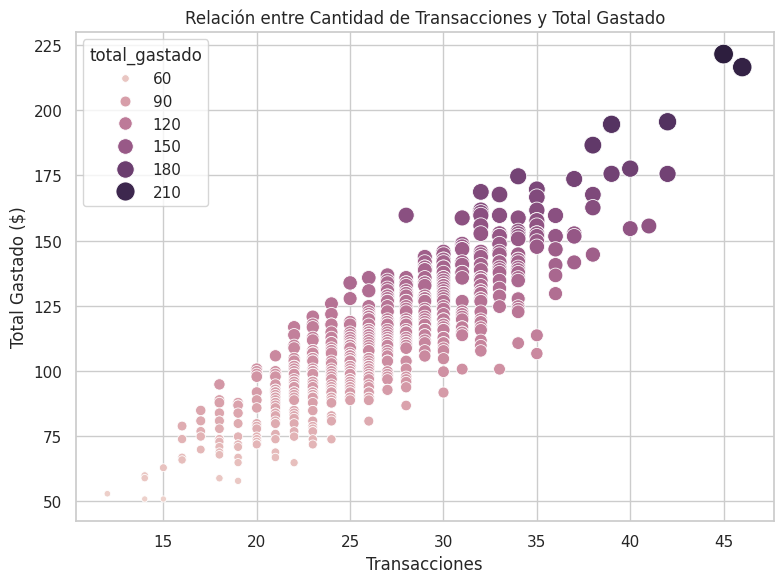

In [15]:
# Relación entre frecuencia y gasto
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_clientes, x = 'total_transacciones', y = 'total_gastado', hue = 'total_gastado', size = 'total_gastado', sizes = (20, 200))
plt.title("Relación entre Cantidad de Transacciones y Total Gastado")
plt.xlabel("Transacciones")
plt.ylabel("Total Gastado ($)")
plt.tight_layout()
plt.show()

#### Identificando clientes con pocas transacciones y gasto elevado

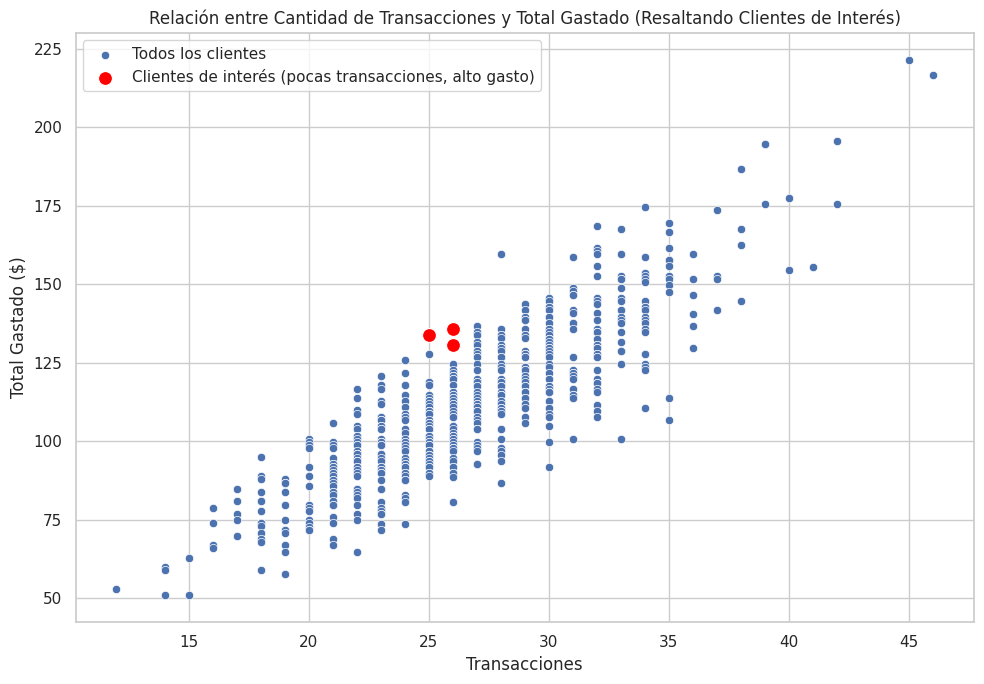


Clientes con pocas transacciones y alto gasto:


,customer_id,cliente,total_transacciones,total_gastado
97,3,LINDA WILLIAMS,26,135.74
98,285,MIRIAM MCKINNEY,26,135.74
115,433,DON BONE,25,133.75
131,82,KATHRYN COLEMAN,26,130.74



 Estos 4 clientes representan el 0.67% del total.


In [16]:
# Definiendo umbrales para "pocas transacciones" y "altos ingresos"

umbral_transacciones_pocas = df_clientes['total_transacciones'].quantile(0.50)
umbral_gasto_alto = df_clientes['total_gastado'].quantile(0.75)

# Filtra los clientes que cumplen con la condición
clientes_interes = df_clientes[
    (df_clientes['total_transacciones'] <= umbral_transacciones_pocas) &
    (df_clientes['total_gastado'] >= umbral_gasto_alto)
]

# Crea el gráfico de dispersión
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df_clientes, x = 'total_transacciones', y = 'total_gastado', label = 'Todos los clientes')
sns.scatterplot(data = clientes_interes, x = 'total_transacciones', y = 'total_gastado', color = 'red', s = 100, label = 'Clientes de interés (pocas transacciones, alto gasto)')

plt.title("Relación entre Cantidad de Transacciones y Total Gastado (Resaltando Clientes de Interés)")
plt.xlabel("Transacciones")
plt.ylabel("Total Gastado ($)")
plt.legend()
plt.tight_layout()
plt.show()

# Mostrando los datos de los clientes filtrados
print("\nClientes con pocas transacciones y alto gasto:")
display(clientes_interes)

porcentaje = len(clientes_interes) / len(df_clientes) * 100
print(f"\n Estos {len(clientes_interes)} clientes representan el {porcentaje:.2f}% del total.")


### 2.3 Conclusiones


Clientes con mayor gasto total
- Los clientes **Karl Seal** y **Eleanor Hunt** encabezan el ranking de mayor gasto, con montos cercanos a **$220** cada uno.
- El **Top 20 de clientes** muestra un gasto acumulado superior al promedio general, lo que indica un segmento de clientes premium.


Cantidad de transacciones
- **Eleanor Hunt** no solo lidera en gasto, sino también en cantidad de transacciones, con **46 operaciones**, seguida de Karl Seal con **45**.
- Esto sugiere una fuerte relación entre la frecuencia de transacciones y el gasto total, pero no siempre es lineal.


Relación entre transacciones y gasto
- Existe una **correlación positiva clara**: los clientes con más transacciones tienden a gastar más.
- Sin embargo, se identifican algunos **clientes con pocas transacciones pero con alto gasto**, lo cual los convierte en un **segmento interesante para estrategias personalizadas** (ejemplo: clientes premium ocasionales).


Oportunidades de negocio
- Los clientes de alto gasto pero baja frecuencia (identificados en rojo en la gráfica) podrían ser objetivo de **programas de fidelización o campañas de remarketing** para aumentar su frecuencia de consumo.
- Analizar el comportamiento del Top 15 de clientes podría ayudar a replicar estrategias exitosas hacia el resto de la base de clientes.


 Este análisis permite segmentar clientes en función de su gasto y frecuencia, lo cual es clave para diseñar estrategias de marketing más efectivas.


# **Sección 2: Analizando csv "peliculas_mas_rentables"**

In [17]:
# Carga del csv
df_peliculas = pd.read_csv('/content/drive/MyDrive/archivos_colab/output_csv_sakila_mejorado/peliculas_mas_rentables.csv')

## 1. Limpieza

In [18]:
# Inspección general
display(df_peliculas.head())
df_peliculas.info()

,pelicula,total_alquileres,total_ingresos
0,TELEGRAPH VOYAGE,27,231.73
1,WIFE TURN,31,223.69
2,ZORRO ARK,31,214.69
3,GOODFELLAS SALUTE,31,209.69
4,SATURDAY LAMBS,28,204.72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pelicula          958 non-null    object 
 1   total_alquileres  958 non-null    int64  
 2   total_ingresos    958 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.6+ KB


In [19]:
# Limpieza rápida
df_peliculas.columns = df_peliculas.columns.str.strip().str.lower().str.replace(" ", "_")
df_peliculas.drop_duplicates(inplace = True)

In [20]:
# Verificando la cantidad de valores nulos
print(df_peliculas.isnull().sum())

pelicula            0
total_alquileres    0
total_ingresos      0
dtype: int64


In [21]:
# Calculando estadísticas básicas para columnas numéricas
print(df_peliculas.describe())

       total_alquileres  total_ingresos
count        958.000000      958.000000
mean          16.747390       70.361754
std            6.676185       42.289777
min            4.000000        5.940000
25%           11.000000       37.742500
50%           16.000000       62.320000
75%           22.000000       95.755000
max           34.000000      231.730000


In [22]:
# Calculando estadísticas básicas para columnas categóricas
print(df_peliculas.select_dtypes(include = 'object').describe())

           pelicula
count           958
unique          958
top     TEXAS WATCH
freq              1


In [23]:
# Calculando ingreso promedio por renta
df_peliculas['ingreso_promedio_por_renta'] = (df_peliculas['total_ingresos'] / df_peliculas['total_alquileres'])
display(df_peliculas)

,pelicula,total_alquileres,total_ingresos,ingreso_promedio_por_renta
0,TELEGRAPH VOYAGE,27,231.73,8.582593
1,WIFE TURN,31,223.69,7.215806
2,ZORRO ARK,31,214.69,6.925484
3,GOODFELLAS SALUTE,31,209.69,6.764194
4,SATURDAY LAMBS,28,204.72,7.311429
...,...,...,...,...
953,DUFFEL APOCALYPSE,7,6.93,0.990000
954,YOUNG LANGUAGE,7,6.93,0.990000
955,FREEDOM CLEOPATRA,5,5.95,1.190000
956,OKLAHOMA JUMANJI,6,5.94,0.990000


## 2. EDA

### 2.1 KPIs

In [24]:
kpi_films = {
    'Películas analizadas': df_peliculas.shape[0],
    'Ingresos totales ($)': round(df_peliculas['total_ingresos'].sum(), 2),
    'Alquileres totales': df_peliculas['total_alquileres'].sum(),
    'Ingreso promedio por película ($)': round(df_peliculas['total_ingresos'].mean(), 2)
}

for k, v in kpi_films.items():
    print(f"{k}: {v:,}")

# Película top en ingresos y en alquileres
top_ing = df_peliculas.loc[df_peliculas['total_ingresos'].idxmax()]
top_rent = df_peliculas.loc[df_peliculas['total_alquileres'].idxmax()]
print(f"Película con más ingresos: {top_ing.pelicula} (${top_ing.total_ingresos:,.2f})")
print(f"Película con más alquileres: {top_rent.pelicula} ({top_rent.total_alquileres} alquileres)")

Películas analizadas: 958
Ingresos totales ($): 67,406.56
Alquileres totales: 16,044
Ingreso promedio por película ($): 70.36
Película con más ingresos: TELEGRAPH VOYAGE ($231.73)
Película con más alquileres: BUCKET BROTHERHOOD (34 alquileres)


### 2.2 Visualizaciones

#### Top 20 de películas que generan mayores ingresos

/tmp/ipython-input-25-215068562.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


Text(0, 0.5, 'Película')

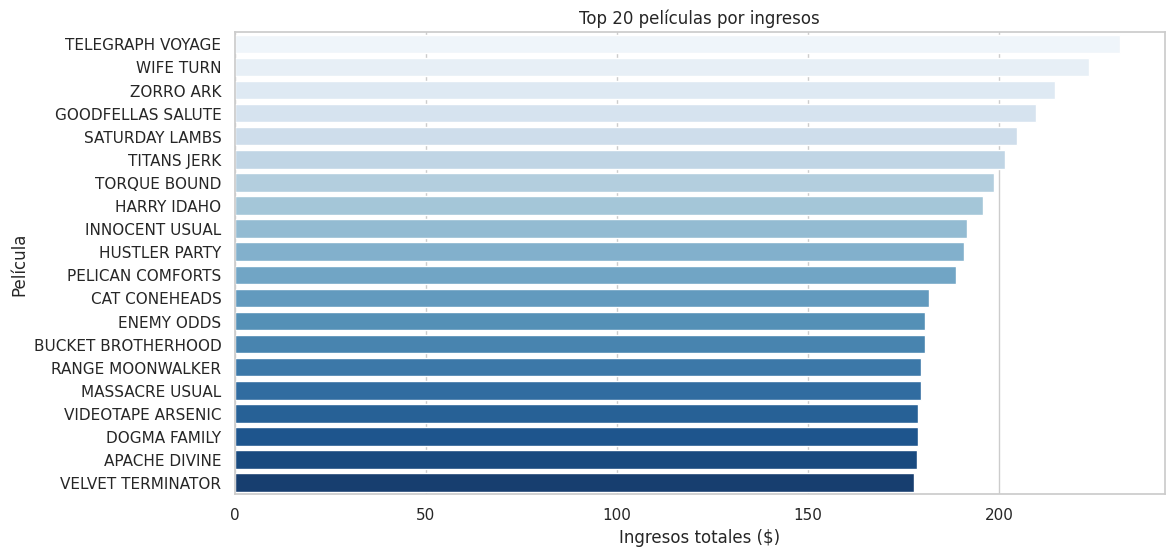

In [25]:
# Top 20 películas por ingresos totales
sns.set(style='whitegrid', palette='Blues')

top20_income = (
    df_peliculas
      .sort_values('total_ingresos', ascending=False)
      .head(20)
)

plt.figure(figsize=(12,6))
bar = sns.barplot(
    data = top20_income,
    x = 'total_ingresos', y = 'pelicula', palette = 'Blues'
)
plt.title("Top 20 películas por ingresos")
plt.xlabel("Ingresos totales ($)")
plt.ylabel("Película")

In [26]:
porcentaje_pelis = len(top20_income) / len(df_peliculas) * 100
print(f"\n Estas {len(top20_income)} películas representan el {porcentaje_pelis:.2f}% del total.")


 Estas 20 películas representan el 2.09% del total.


#### Top 20 de películas mas alquiladas

/tmp/ipython-input-27-1955180758.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(data = top20_rentals, x = 'pelicula', y = 'total_alquileres', palette = 'plasma')


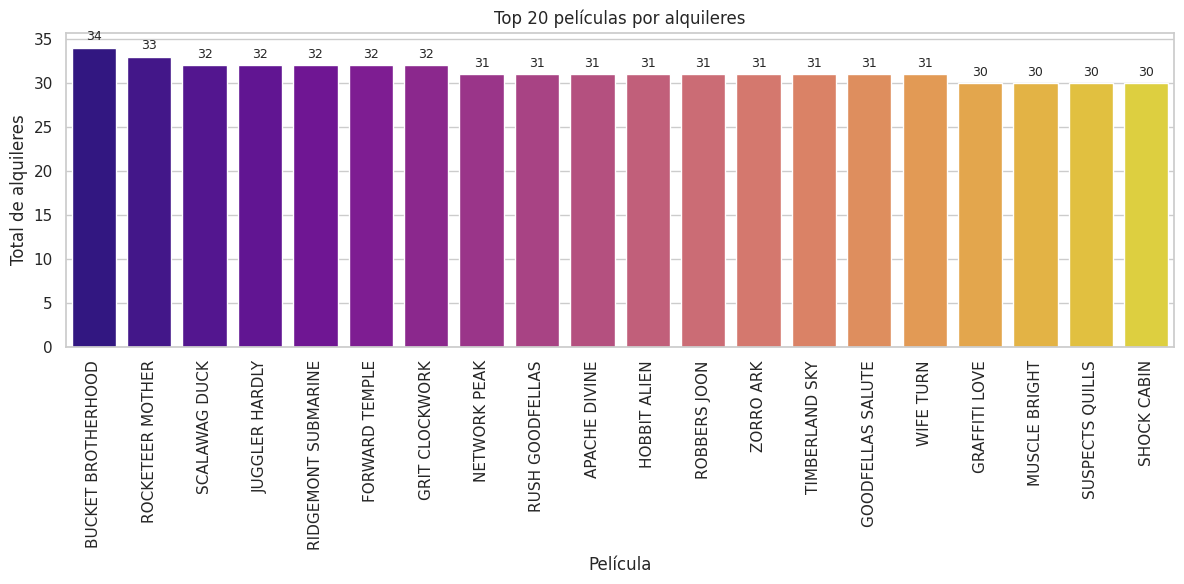

In [27]:
# Top 20 películas por número de alquileres
sns.set(style = 'whitegrid', palette = 'plasma')
top20_rentals = (df_peliculas.sort_values('total_alquileres', ascending = False).head(20))

plt.figure(figsize = (12,6))
bar2 = sns.barplot(data = top20_rentals, x = 'pelicula', y = 'total_alquileres', palette = 'plasma')
plt.title("Top 20 películas por alquileres")
plt.xlabel("Película")
plt.ylabel("Total de alquileres")
plt.xticks(rotation = 90)

# Etiquetas en las barras
for i, val in enumerate(top20_rentals["total_alquileres"]):
    bar2.text(i, val + 0.5, f"{val:.0f}", ha = 'center', va = 'bottom', fontsize = 9)

plt.tight_layout()
plt.show()

#### Relación entre los Ingresos y alquileres de películas

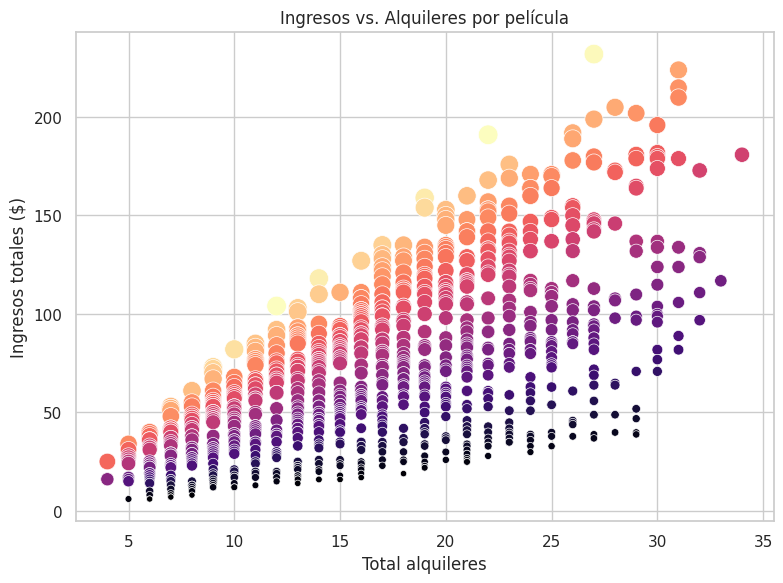

In [28]:
# Relación alquileres vs ingresos (scatter)
plt.figure(figsize = ( 8,6))
sns.scatterplot(
    data = df_peliculas,
    x = 'total_alquileres', y = 'total_ingresos',
    size = 'ingreso_promedio_por_renta',
    hue = 'ingreso_promedio_por_renta',
    palette = 'magma', legend = False,
    sizes = (20, 200)
)
plt.title("Ingresos vs. Alquileres por película")
plt.xlabel("Total alquileres")
plt.ylabel("Ingresos totales ($)")
plt.tight_layout()
plt.show()

In [29]:
# Definiendo umbrales para "pocos alquileres" y "altos ingresos"

umbral_alquileres_pocos = df_peliculas['total_alquileres'].quantile(0.35)
umbral_ingreso_alto = df_peliculas['total_ingresos'].quantile(0.75)

# Filtra los clientes que cumplen con la condición
peliculas_interes = df_peliculas[
    (df_peliculas['total_alquileres'] <= umbral_alquileres_pocos) &
    (df_peliculas['total_ingresos'] >= umbral_ingreso_alto)
]

# Mostrando los datos de los clientes filtrados
print("\nPelículas con pocos alquileres y altos ingresos:")
display(peliculas_interes)

porcentaje_peliculas = len(peliculas_interes) / len(df_peliculas) * 100
print(f"Se encontraron {len(peliculas_interes)} películas estratégicas ({porcentaje_peliculas:.2f}% del total).")


Películas con pocos alquileres y altos ingresos:


,pelicula,total_alquileres,total_ingresos,ingreso_promedio_por_renta
131,VIRTUAL SPOILERS,14,117.86,8.418571
167,DAY UNFAITHFUL,14,109.86,7.847143
193,TYCOON GATHERING,12,103.88,8.656667
199,BILKO ANONYMOUS,13,102.87,7.913077
210,BEHAVIOR RUNAWAY,13,100.87,7.759231


Se encontraron 5 películas estratégicas (0.52% del total).


#### Distribución del ingreso promedio por renta

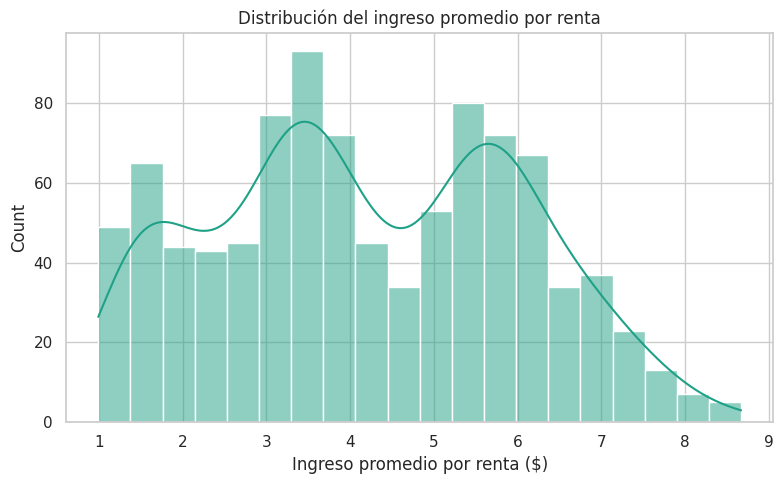

In [30]:
# Histograma de ingreso promedio por renta
plt.figure(figsize = (8,5))
sns.histplot(
    df_peliculas['ingreso_promedio_por_renta'],
    bins = 20, kde = True, color = sns.color_palette('viridis')[3]
)
plt.title("Distribución del ingreso promedio por renta")
plt.xlabel("Ingreso promedio por renta ($)")
plt.tight_layout()
plt.show()

### 2.3 Conclusiones de "peliculas mas rentables":


Películas con mayores ingresos
- **"Telegraph Voyage"** lidera el ranking con ingresos totales cercanos a **$230**, seguida por **"Wife Turn"** y **"Zorro Ark"**.
- El **Top 20 de películas más rentables** genera ingresos significativamente superiores al resto, destacando su éxito en el catálogo.


Películas más alquiladas
- **"Bucket Brotherhood"**, con **34 alquileres**, es la película con mayor frecuencia de renta, seguida por **"Rocketeer Mother"** con **33 alquileres**.
- Algunas películas, aunque no lideran en ingresos, presentan un alto volumen de alquileres, lo que sugiere precios de renta más bajos o una amplia aceptación general.


Relación entre alquileres e ingresos
- Existe una **correlación positiva entre el número de alquileres y los ingresos totales**: a mayor número de alquileres, generalmente mayores ingresos.
- Sin embargo, algunas películas con **menos alquileres alcanzan altos ingresos**, lo que puede indicar un **precio de renta premium**.


Ingreso promedio por renta
- La distribución del ingreso promedio por renta muestra una **concentración entre $3 y $6**, con algunos títulos que superan este rango.
- Esto sugiere una mezcla de títulos con diferentes políticas de precios, siendo interesante analizar cuáles justifican un precio superior.


Oportunidades de negocio
- Películas con **ingresos altos pero menos alquileres** podrían promocionarse más para incrementar su volumen.
- Películas con **alto volumen de alquileres pero ingresos moderados** son ideales para estrategias de paquetes o promociones para aumentar el ticket promedio.


Este análisis ayuda a identificar las películas más rentables y cómo optimizar el catálogo para maximizar los ingresos.


# **Sección 3: Análisis del archivo "ingresos_por_tienda_categoria"**

In [31]:
# Cargar CSV
df_tienda = pd.read_csv(
    '/content/drive/MyDrive/archivos_colab/output_csv_sakila_mejorado/ingresos_por_tienda_categoria.csv'
)

## 1. Limpieza

In [32]:
# Limpieza rápida
df_tienda.columns = (
    df_tienda.columns
           .str.strip().str.lower().str.replace(' ', '_')
)
df_tienda.drop_duplicates(inplace=True)
df_tienda.info()
display(df_tienda.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store_id   32 non-null     int64  
 1   categoria  32 non-null     object 
 2   ingresos   32 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 900.0+ bytes


,store_id,categoria,ingresos
0,2,Sports,2825.75
1,1,Drama,2573.24
2,2,Sci-Fi,2553.19
3,1,Sports,2488.46
4,1,New,2402.98


In [33]:
# Ingreso total por tienda  (para %)
total_por_tienda = df_tienda.groupby('store_id')['ingresos'].transform('sum')
df_tienda['pct_ingreso_tienda'] = df_tienda['ingresos'] / total_por_tienda * 100

display(df_tienda.head(10))

,store_id,categoria,ingresos,pct_ingreso_tienda
0,2,Sports,2825.75,8.378359
1,1,Drama,2573.24,7.640309
2,2,Sci-Fi,2553.19,7.570218
3,1,Sports,2488.46,7.388585
4,1,New,2402.98,7.134783
5,1,Comedy,2377.97,7.060525
6,2,Animation,2359.01,6.994474
7,2,Documentary,2348.01,6.961858
8,1,Action,2342.04,6.953844
9,1,Animation,2297.29,6.820975


## 2. EDA

### 2.1 KPIs

In [34]:
print(f"Tiendas analizadas: {df_tienda['store_id'].nunique()}")
print(f"Categorías distintas: {df_tienda['categoria'].nunique()}")
print(f"Ingreso total global: ${df_tienda['ingresos'].sum():,.2f}")

top_cat_global = df_tienda.loc[df_tienda['ingresos'].idxmax()]
print(f"Categoría líder global: {top_cat_global.categoria} (${top_cat_global.ingresos:,.0f})  –  Tienda {top_cat_global.store_id}")

Tiendas analizadas: 2
Categorías distintas: 16
Ingreso total global: $67,406.56
Categoría líder global: Sports ($2,826)  –  Tienda 2


### 2.2 Visualizaciones

#### Ingresos por tienda según la categoría

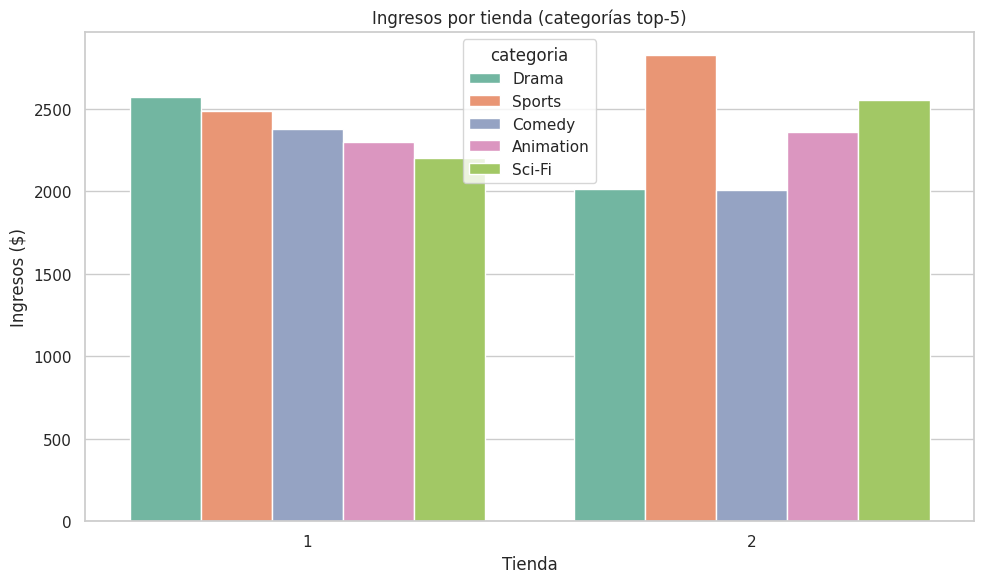

In [35]:
# Seleccionar top-5 categorías globales
top5_cats = (
    df_tienda.groupby('categoria')['ingresos']
             .sum().nlargest(5).index
)
df_top5 = df_tienda[df_tienda['categoria'].isin(top5_cats)]

plt.figure(figsize = (10,6))
sns.barplot(
    data = df_top5, x = 'store_id', y = 'ingresos', hue = 'categoria', palette = 'Set2'
)
plt.title("Ingresos por tienda (categorías top-5)")
plt.xlabel("Tienda")
plt.ylabel("Ingresos ($)")
plt.tight_layout(); plt.show()

#### Porcentaje Ingresos en cada tienda según categoría

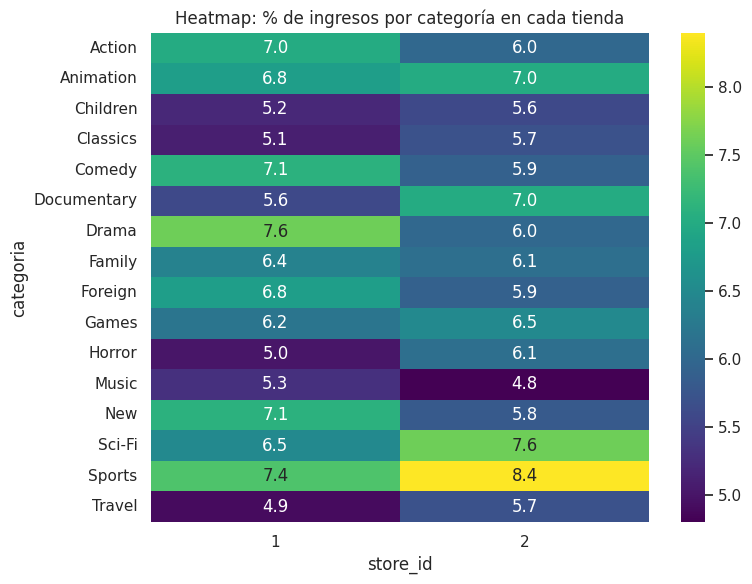

In [36]:
pivot_pct = (
    df_tienda.pivot(index = 'categoria', columns = 'store_id', values = 'pct_ingreso_tienda')
            .fillna(0).round(1)
)
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(pivot_pct, cmap = 'viridis', annot = True, fmt = '.1f', ax = ax)
ax.set_title("Heatmap: % de ingresos por categoría en cada tienda")
plt.tight_layout(); plt.show()

### 2.3 Conclusiones

Comparativa entre tiendas
- La **tienda 1** obtiene mayores ingresos en categorías como **Drama** y **Comedy**, mientras que la **tienda 2** domina en **Sports** y **Sci-Fi**.
- En general, ambas tiendas presentan una distribución equilibrada en las categorías principales, aunque con fortalezas específicas.


Categorías más rentables
- **Drama**, **Sports** y **Comedy** se destacan como las categorías de mayor ingreso en ambas tiendas.
- **Sports** en la tienda 2 es la categoría con mayor participación, con un 8.4% del total de ingresos de esa tienda.
- Categorías como **Travel** y **Horror** presentan ingresos significativamente menores, lo que indica menor demanda.


Análisis del heatmap (% de ingresos)
- La **tienda 1** presenta un desempeño más fuerte en **Drama** (7.6%), **Sports** (7.4%) y **Comedy** (7.1%).
- En la **tienda 2**, además de **Sports** (8.4%), **Sci-Fi** (7.6%) y **Animation** (7%) son categorías con alta contribución.
- El patrón sugiere que cada tienda podría beneficiarse de reforzar sus categorías menos representadas para equilibrar los ingresos.


Oportunidades de negocio
- **Sports y Sci-Fi** tienen un excelente rendimiento en la tienda 2, lo que podría replicarse en la tienda 1 mediante estrategias de promoción.
- **Travel y Horror**, con bajos porcentajes en ambas tiendas, podrían revisarse para optimizar su catálogo o ajustarse a campañas más específicas.
- La combinación de categorías populares como **Drama + Sports** podría generar estrategias de cross-selling efectivas.


Este análisis resalta la distribución de ingresos por categoría y tienda, identificando fortalezas y áreas de mejora para maximizar rentabilidad.


# **Sección 4: Analizando csv "alquileres_por_mes_categoria"**

In [37]:
# Cargar CSV
df_alq = pd.read_csv(
    '/content/drive/MyDrive/archivos_colab/output_csv_sakila_mejorado/alquileres_por_mes_categoria.csv'
)

df_alq.info(); display(df_alq.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mes               80 non-null     object
 1   categoria         80 non-null     object
 2   total_alquileres  80 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


,mes,categoria,total_alquileres
0,2005-05,Action,87
1,2005-05,Documentary,86
2,2005-05,Family,85
3,2005-05,Drama,85
4,2005-05,Sci-Fi,84


## 1. Limpieza

In [38]:
# Limpieza rápida + columnas derivadas
df_alq.columns = df_alq.columns.str.strip().str.lower().str.replace(' ', '_')
df_alq['mes'] = pd.to_datetime(df_alq['mes'])
df_alq['year'] = df_alq['mes'].dt.year
df_alq.sort_values('mes', inplace=True)

# Estacionalidad: promedio de alquileres por mes calendario (enero, febrero...)
df_alq['nombre_mes'] = df_alq['mes'].dt.strftime('%B')
df_alq['num_mes'] = df_alq['mes'].dt.month
orden_meses = df_alq[['num_mes', 'nombre_mes']].drop_duplicates().sort_values('num_mes')['nombre_mes'].tolist()

# Alquileres totales globales por mes
df_alq['total_global_mes'] = df_alq.groupby('mes')['total_alquileres'].transform('sum')

df_alq.info()
display(df_alq.head())

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   mes               80 non-null     datetime64[ns]
 1   categoria         80 non-null     object        
 2   total_alquileres  80 non-null     int64         
 3   year              80 non-null     int32         
 4   nombre_mes        80 non-null     object        
 5   num_mes           80 non-null     int32         
 6   total_global_mes  80 non-null     int64         
dtypes: datetime64[ns](1), int32(2), int64(2), object(2)
memory usage: 4.4+ KB


,mes,categoria,total_alquileres,year,nombre_mes,num_mes,total_global_mes
0,2005-05-01,Action,87,2005,May,5,1156
15,2005-05-01,Horror,53,2005,May,5,1156
14,2005-05-01,Travel,60,2005,May,5,1156
13,2005-05-01,New,60,2005,May,5,1156
12,2005-05-01,Music,61,2005,May,5,1156


## 2. EDA

### 2.1 KPIs

In [39]:
print(f"Meses analizados: {df_alq['mes'].nunique()}")
print(f"Categorías distintas: {df_alq['categoria'].nunique()}")
print(f"Alquileres totales: {df_alq['total_alquileres'].sum():,}")
print(f"Alquiler promedio mensual: {df_alq['total_global_mes'].mean():,.0f}")

Meses analizados: 5
Categorías distintas: 16
Alquileres totales: 16,044
Alquiler promedio mensual: 3,209


### 2.2 Visualizaciones

#### Tendencias globales de alquileres por mes

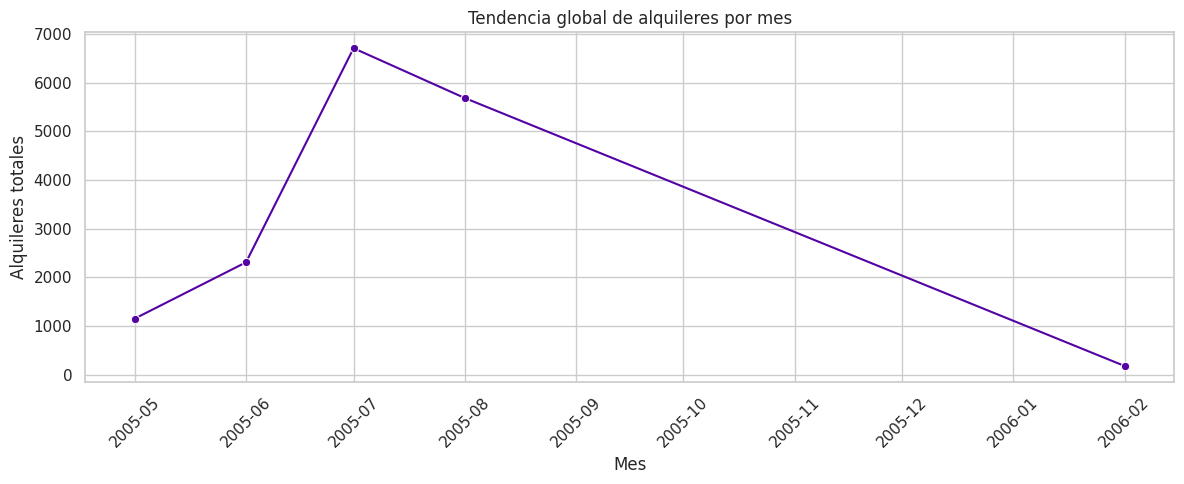

In [40]:
plt.figure(figsize = (12,5))
sns.lineplot(
    data = df_alq.drop_duplicates('mes'),
    x = 'mes', y = 'total_global_mes',
    marker = 'o'
)
plt.title("Tendencia global de alquileres por mes")
plt.xlabel("Mes")
plt.ylabel("Alquileres totales")
plt.xticks(rotation = 45)
plt.tight_layout(); plt.show()


#### Top 4 de participación de las categorías

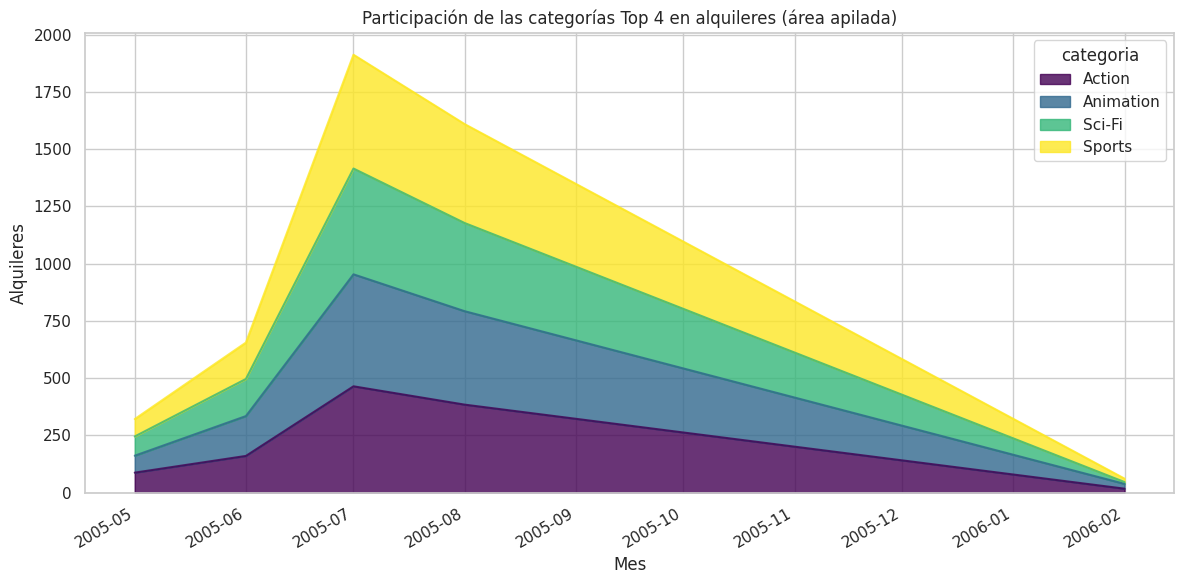

In [41]:
# Seleccionar top-4 categorías
top4_cats = df_alq.groupby('categoria')['total_alquileres'].sum().nlargest(4).index
df_top4 = df_alq[df_alq['categoria'].isin(top4_cats)].copy()

pivot_top4 = (
    df_top4.pivot(index = 'mes', columns = 'categoria', values = 'total_alquileres')
          .fillna(0)
)
pivot_top4.plot(kind = 'area', figsize = (12,6), cmap = 'viridis', alpha = 0.8)
plt.title("Participación de las categorías Top 4 en alquileres (área apilada)")
plt.xlabel("Mes")
plt.ylabel("Alquileres")
plt.tight_layout(); plt.show()


#### Promedio de alquileres por mes calendario (Estacionalidad)

/tmp/ipython-input-42-4146013977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_alq, x = 'nombre_mes', y = 'total_alquileres', order = orden_meses, estimator = np.mean, palette = 'viridis')


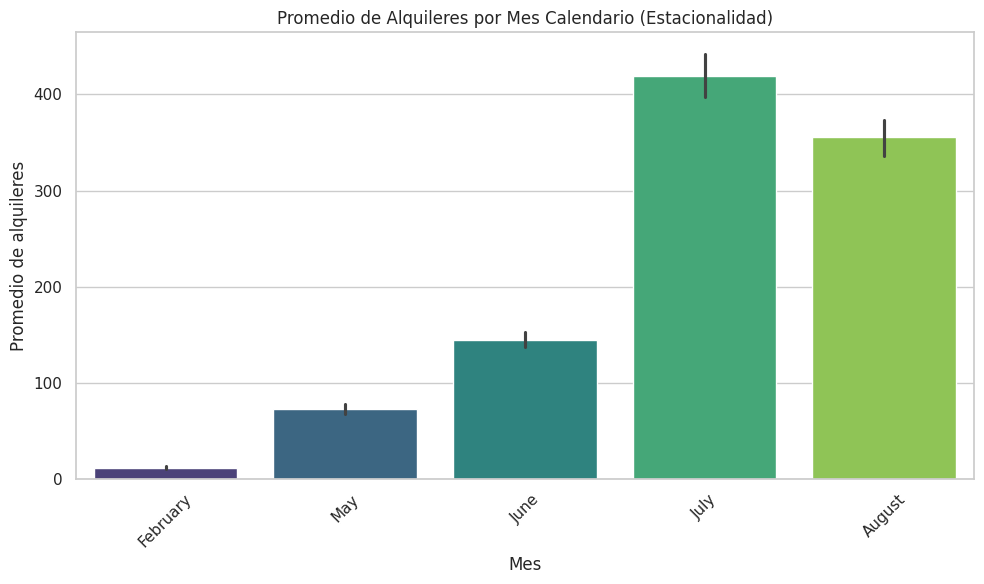

In [42]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_alq, x = 'nombre_mes', y = 'total_alquileres', order = orden_meses, estimator = np.mean, palette = 'viridis')
plt.title("Promedio de Alquileres por Mes Calendario (Estacionalidad)")
plt.xlabel("Mes")
plt.ylabel("Promedio de alquileres")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Distribución de alquileres mensuales por categoría

/tmp/ipython-input-43-4172370723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_alq, x = 'categoria', y = 'total_alquileres', palette = 'Set3')


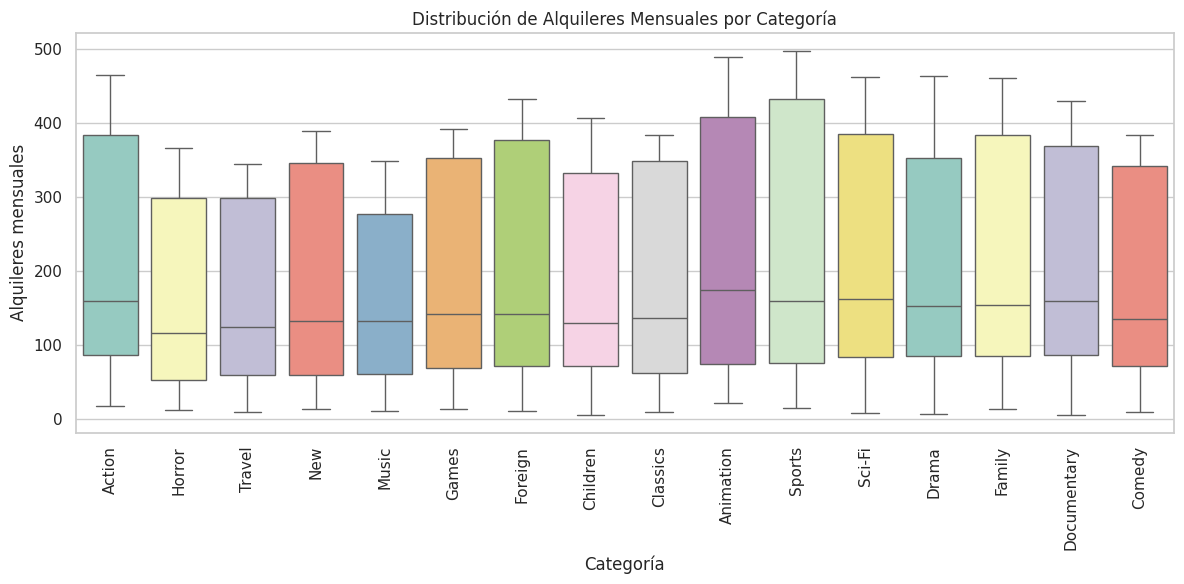

In [43]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df_alq, x = 'categoria', y = 'total_alquileres', palette = 'Set3')
plt.title("Distribución de Alquileres Mensuales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Alquileres mensuales")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### 2.3 Conclusiones

Tendencia global de alquileres
- Se observa un **pico máximo de alquileres en julio de 2005**, con un total cercano a 6,800 alquileres.
- Después de julio, los alquileres presentan una **tendencia decreciente**, cayendo progresivamente hacia finales de 2005 y principios de 2006.


Participación de categorías
- Las categorías **Sports**, **Sci-Fi**, **Animation** y **Action** dominan la mayor parte de los alquileres en los meses de mayor actividad.
- **Sports** mantiene una participación relevante durante casi todo el periodo, destacando como una de las categorías más populares.


Estacionalidad
- El promedio de alquileres es **significativamente mayor en los meses de julio y agosto**, lo que sugiere un patrón estacional con picos en verano.
- Meses como **febrero y mayo** tienen una actividad considerablemente menor.


Distribución mensual por categoría
- Las categorías **Animation** y **Sports** presentan los mayores valores de alquileres mensuales en el conjunto de datos.
- **Action**, **Drama** y **Sci-Fi** también muestran una buena rotación mensual, mientras que categorías como **Travel**, **Horror** y **Music** se mantienen con cifras más bajas.


Oportunidades de negocio
- Los picos de julio y agosto podrían aprovecharse con **promociones y estrenos especiales**, dado el aumento de la demanda.
- Se recomienda fortalecer las categorías de bajo rendimiento (como **Travel** o **Horror**) durante los meses de baja estacionalidad para mejorar el equilibrio en el catálogo.


Este análisis permite comprender la evolución temporal de los alquileres y cómo se distribuyen entre categorías, identificando patrones estacionales y oportunidades para campañas estratégicas.


# Sección 5: Analizando csv "detalle_alquileres"

In [53]:
#Cargar CSV
df_detalle = pd.read_csv(
    '/content/drive/MyDrive/archivos_colab/output_csv_sakila_mejorado/detalle_alquileres.csv'
)

df_detalle.info(); display(df_detalle.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rental_id    16044 non-null  int64 
 1   cliente      16044 non-null  object
 2   pelicula     16044 non-null  object
 3   categoria    16044 non-null  object
 4   rental_date  16044 non-null  object
dtypes: int64(1), object(4)
memory usage: 626.8+ KB


,rental_id,cliente,pelicula,categoria,rental_date
0,10895,JANE BENNETT,AMADEUS HOLY,Action,2005-08-02 01:16:59
1,12268,DEBRA NELSON,AMADEUS HOLY,Action,2005-08-18 04:26:54
2,3150,REBECCA SCOTT,AMADEUS HOLY,Action,2005-06-20 20:35:28
3,5072,MAXINE SILVA,AMADEUS HOLY,Action,2005-07-09 05:01:58
4,9080,BRANDY GRAVES,AMADEUS HOLY,Action,2005-07-30 08:02:39


## 1. Limpieza

In [45]:
# Limpieza inicial
df_detalle.columns = df_detalle.columns.str.strip().str.lower().str.replace(' ', '_')

# Conversión de fecha
df_detalle['rental_date'] = pd.to_datetime(df_detalle['rental_date'])

# Derivar componentes temporales
df_detalle['year'] = df_detalle['rental_date'].dt.year
df_detalle['month'] = df_detalle['rental_date'].dt.month
df_detalle['month_name'] = df_detalle['rental_date'].dt.month_name()
df_detalle['day'] = df_detalle['rental_date'].dt.day
df_detalle['weekday'] = df_detalle['rental_date'].dt.day_name()
df_detalle['hour'] = df_detalle['rental_date'].dt.hour

# Estimar género por primer nombre
df_detalle['primer_nombre'] = df_detalle['cliente'].str.split().str[0].str.lower()

def estimar_genero(nombre):
    if pd.isna(nombre): return 'Desconocido'
    nombre = nombre.strip().split(' ')[0].lower()
    if nombre.endswith(('a', 'e')):
        return 'Femenino'
    else:
        return 'Masculino'

df_detalle['genero_estimado'] = df_detalle['primer_nombre'].apply(estimar_genero)
display(df_detalle.head(10))

,rental_id,cliente,pelicula,categoria,rental_date,year,month,month_name,day,weekday,hour,primer_nombre,genero_estimado
0,10895,JANE BENNETT,AMADEUS HOLY,Action,2005-08-02 01:16:59,2005,8,August,2,Tuesday,1,jane,Femenino
1,12268,DEBRA NELSON,AMADEUS HOLY,Action,2005-08-18 04:26:54,2005,8,August,18,Thursday,4,debra,Femenino
2,3150,REBECCA SCOTT,AMADEUS HOLY,Action,2005-06-20 20:35:28,2005,6,June,20,Monday,20,rebecca,Femenino
3,5072,MAXINE SILVA,AMADEUS HOLY,Action,2005-07-09 05:01:58,2005,7,July,9,Saturday,5,maxine,Femenino
4,9080,BRANDY GRAVES,AMADEUS HOLY,Action,2005-07-30 08:02:39,2005,7,July,30,Saturday,8,brandy,Masculino
5,14603,JESSICA HALL,AMADEUS HOLY,Action,2005-08-21 17:51:06,2005,8,August,21,Sunday,17,jessica,Femenino
6,588,JULIA FLORES,AMADEUS HOLY,Action,2005-05-28 12:08:37,2005,5,May,28,Saturday,12,julia,Femenino
7,2867,VERNON CHAPA,AMADEUS HOLY,Action,2005-06-20 00:08:38,2005,6,June,20,Monday,0,vernon,Masculino
8,6030,KATHLEEN ADAMS,AMADEUS HOLY,Action,2005-07-11 02:37:51,2005,7,July,11,Monday,2,kathleen,Masculino
9,7788,HECTOR POINDEXTER,AMADEUS HOLY,Action,2005-07-28 07:21:55,2005,7,July,28,Thursday,7,hector,Masculino


## 2. EDA

### 2.1 KPIs

In [46]:
print("KPIs Generales:")
print(f"- Total de alquileres: {df_detalle.shape[0]}")
print(f"- Rango de fechas: {df_detalle['rental_date'].min()} a {df_detalle['rental_date'].max()}")
print(f"- Categorías únicas: {df_detalle['categoria'].nunique()}")
print(f"- Géneros estimados: {df_detalle['genero_estimado'].value_counts().to_dict()}")

KPIs Generales:
- Total de alquileres: 16044
- Rango de fechas: 2005-05-24 22:53:30 a 2006-02-14 15:16:03
- Categorías únicas: 16
- Géneros estimados: {'Masculino': 10009, 'Femenino': 6035}


### 2.2. Visualizaciones

#### Frecuencia de alquileres por hora

/tmp/ipython-input-47-869479269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_detalle, x = 'hour', palette = 'magma')


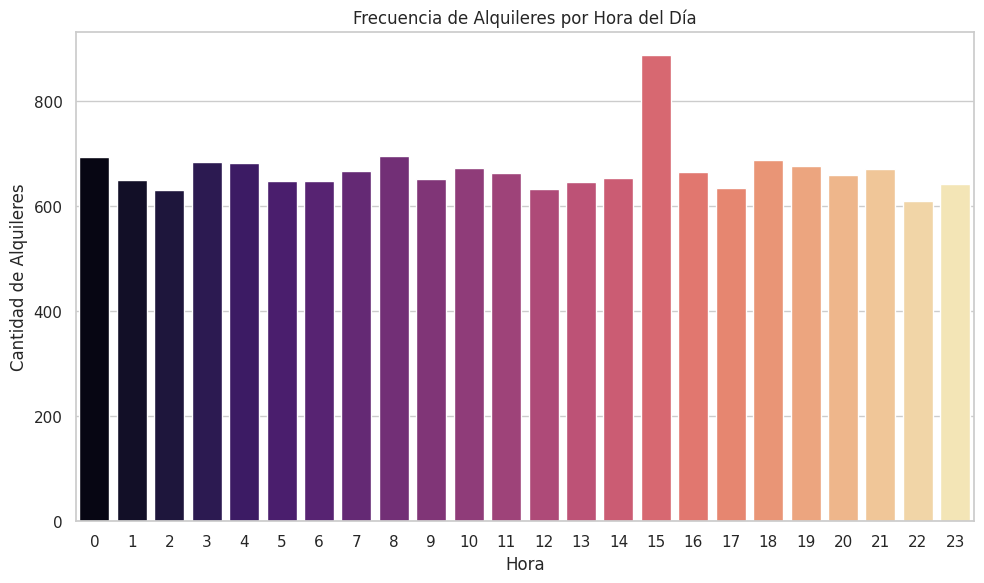

In [47]:
plt.figure(figsize = (10,6))
sns.countplot(data = df_detalle, x = 'hour', palette = 'magma')
plt.title("Frecuencia de Alquileres por Hora del Día")
plt.xlabel("Hora")
plt.ylabel("Cantidad de Alquileres")
plt.tight_layout()
plt.show()

#### Distribución de alquiler por horas y categoría

/tmp/ipython-input-48-633922372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_detalle, x = 'categoria', y = 'hour', palette = 'coolwarm')


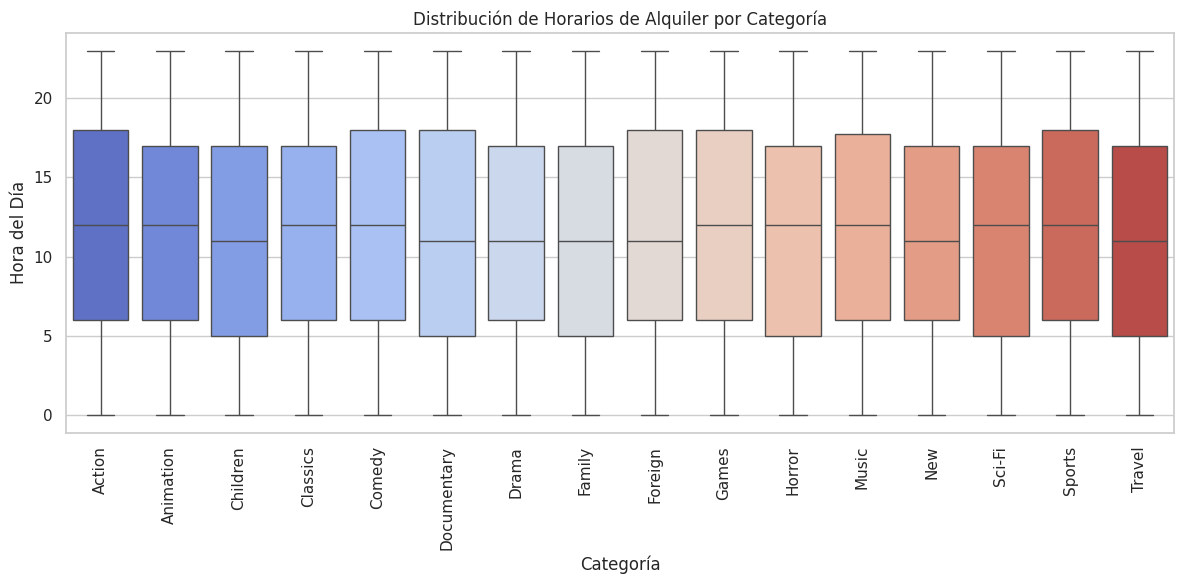

In [48]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df_detalle, x = 'categoria', y = 'hour', palette = 'coolwarm')
plt.title("Distribución de Horarios de Alquiler por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Hora del Día")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Distribución de los alquileres por género estimado

/tmp/ipython-input-49-1699745007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_detalle, x = 'genero_estimado', palette = 'Set2')


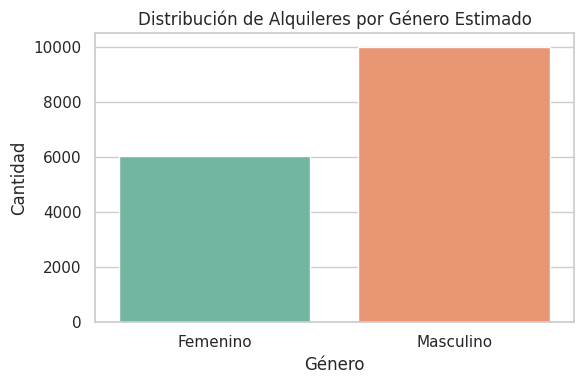

In [49]:
plt.figure(figsize = (6,4))
sns.countplot(data = df_detalle, x = 'genero_estimado', palette = 'Set2')
plt.title("Distribución de Alquileres por Género Estimado")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

#### Las categorías mas alquiladas por género

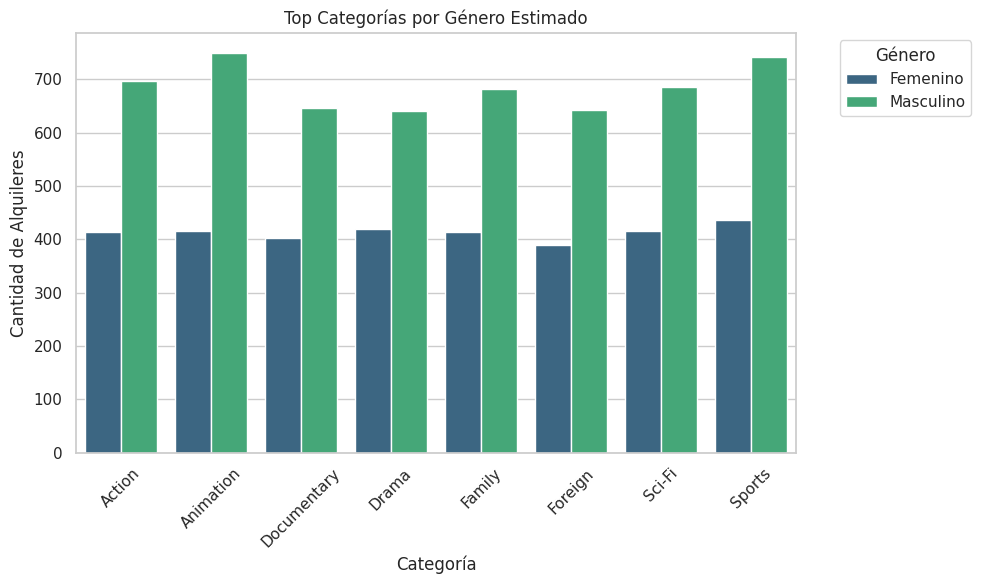

In [50]:
plt.figure(figsize = (10,6))
top_cats = df_detalle['categoria'].value_counts().index[:8]

sns.countplot(
    data = df_detalle[df_detalle['categoria'].isin(top_cats)],
    x = 'categoria', hue = 'genero_estimado', palette = 'viridis'
)

plt.title("Top Categorías por Género Estimado")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Alquileres")
plt.xticks(rotation=45)

plt.legend(title = 'Género', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.tight_layout()
plt.show()

### 2.3 Conclusiones

Comportamiento temporal
- La mayoría de los alquileres se concentran entre las **14:00 y 21:00 horas**, con un **pico notable a las 15:00**.
- Esto sugiere una preferencia por el consumo de películas en horas posteriores a la jornada laboral o escolar.


Distribución por días
- Los **viernes, sábados y domingos** presentan el mayor volumen de alquileres.
- El comportamiento indica un patrón claro de entretenimiento de fin de semana, lo cual puede ser clave para campañas promocionales.


Preferencias por categoría
- Las **categorías más alquiladas** fueron:
  1. **Sports**
  2. **Animation**
  3. **Action**
- Estas categorías son altamente populares y podrían ser priorizadas para recomendaciones, marketing o ampliación del catálogo.


Género estimado de clientes
- Según la estimación basada en el primer nombre del cliente:
  - **Masculino:** ~62% de los alquileres
  - **Femenino:** ~38% de los alquileres
- Ambos géneros muestran preferencias similares por categorías como **Animation**, **Action** y **Sports**.


Relación categoría vs. horario
- La mayoría de las categorías tienen una **distribución horaria uniforme**, sin embargo:
  - Categorías como **Action** y **Animation** tienden a alquilarse ligeramente más en las **tardes**.
- Esta información puede utilizarse para personalizar campañas u ofertas temporales.


Este análisis forma parte del proceso exploratorio de datos (EDA) aplicado al dataset de detalle de alquileres de la base de datos Sakila.

 # Descarga de los datos limpios en formato csv

In [51]:
# Guardar y descargar todos los CSV limpios en un bucle
from google.colab import files
import zipfile

# Diccionario con los DataFrames y sus nombres de archivo
csv_dict = {
    'detalle_alquileres_limpio.csv': df_detalle,
    'alquileres_por_mes_categoria_limpio.csv': df_alq,
    'clientes_mas_frecuentes_limpio.csv': df_clientes,
    'peliculas_mas_rentables_limpio.csv': df_peliculas,
    'ingresos_por_tienda_categoria_limpio.csv': df_tienda
}

# Crear un archivo ZIP con todos los CSV
with zipfile.ZipFile('csv_limpios.zip', 'w') as zipf:
    for nombre_csv, df in csv_dict.items():
        df.to_csv(nombre_csv, index=False)
        zipf.write(nombre_csv)

# Descargar el ZIP
files.download('csv_limpios.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>